In [ ]:
import pandas as pd
from pathlib2 import Path

## **Loading the datasets.**

In [167]:
data_path = Path("data")

In [168]:
item_categories = pd.read_csv(data_path / 'item_categories.csv')

In [169]:
sales_train = pd.read_csv(data_path / "sales_train.csv")

In [170]:
shops = pd.read_csv(data_path / "shops.csv")

In [171]:
items = pd.read_csv(data_path / "items.csv")

In [172]:
test = pd.read_csv(data_path / "test.csv")

# **Reading the data**

In [173]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [174]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [175]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [176]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [177]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


## **Merging the data using joins to form a single dataset**

In [178]:
res = pd.merge(item_categories, items, on='item_category_id')

res.head()

,item_category_name,item_category_id,item_name,item_id
0,PC - Гарнитуры/Наушники,0,PC: Гарнитура HyperX Cloud Core игровая стерео...,5441
1,PC - Гарнитуры/Наушники,0,Наушники PHILIPS SBC HC8680,16255
2,PC - Гарнитуры/Наушники,0,Наушники RITMIX RH-120,16256
3,PC - Гарнитуры/Наушники,0,Наушники RITMIX RH-124 Black,16257
4,Аксессуары - PS2,1,PS2: Карта памяти 8 Мб черная (Memory Card 8Mb...,5606


In [179]:
res2 = pd.merge(sales_train, res, on = 'item_id')
res2.head()



,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_name,item_category_id,item_name
0,02.01.2013,0,59,22154,999.0,1.0,Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
1,23.01.2013,0,24,22154,999.0,1.0,Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
2,20.01.2013,0,27,22154,999.0,1.0,Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
3,02.01.2013,0,25,22154,999.0,1.0,Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
4,03.01.2013,0,25,22154,999.0,1.0,Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)


In [180]:
data = pd.merge(shops, res2, on = 'shop_id')

In [181]:
data.head()

,shop_name,shop_id,date,date_block_num,item_id,item_price,item_cnt_day,item_category_name,item_category_id,item_name
0,"!Якутск Орджоникидзе, 56 фран",0,10.02.2013,1,22154,657.0,1.0,Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
1,"!Якутск Орджоникидзе, 56 фран",0,05.02.2013,1,22154,657.0,1.0,Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
2,"!Якутск Орджоникидзе, 56 фран",0,28.01.2013,0,2564,242.0,1.0,Музыка - Музыкальное видео,59,DEEP PURPLE Perihelion: Live In Concert DVD (К...
3,"!Якутск Орджоникидзе, 56 фран",0,13.02.2013,1,2572,183.0,1.0,Музыка - CD локального производства,55,DEFTONES Koi No Yokan
4,"!Якутск Орджоникидзе, 56 фран",0,20.02.2013,1,2573,190.0,1.0,Музыка - CD локального производства,55,DEL REY LANA Born To Die


# **Final Dataframe**

In [182]:
data.shape

(2935849, 10)

In [183]:
data.isnull().sum() #Checking for Null values

shop_name             0
shop_id               0
date                  0
date_block_num        0
item_id               0
item_price            0
item_cnt_day          0
item_category_name    0
item_category_id      0
item_name             0
dtype: int64

<AxesSubplot: >

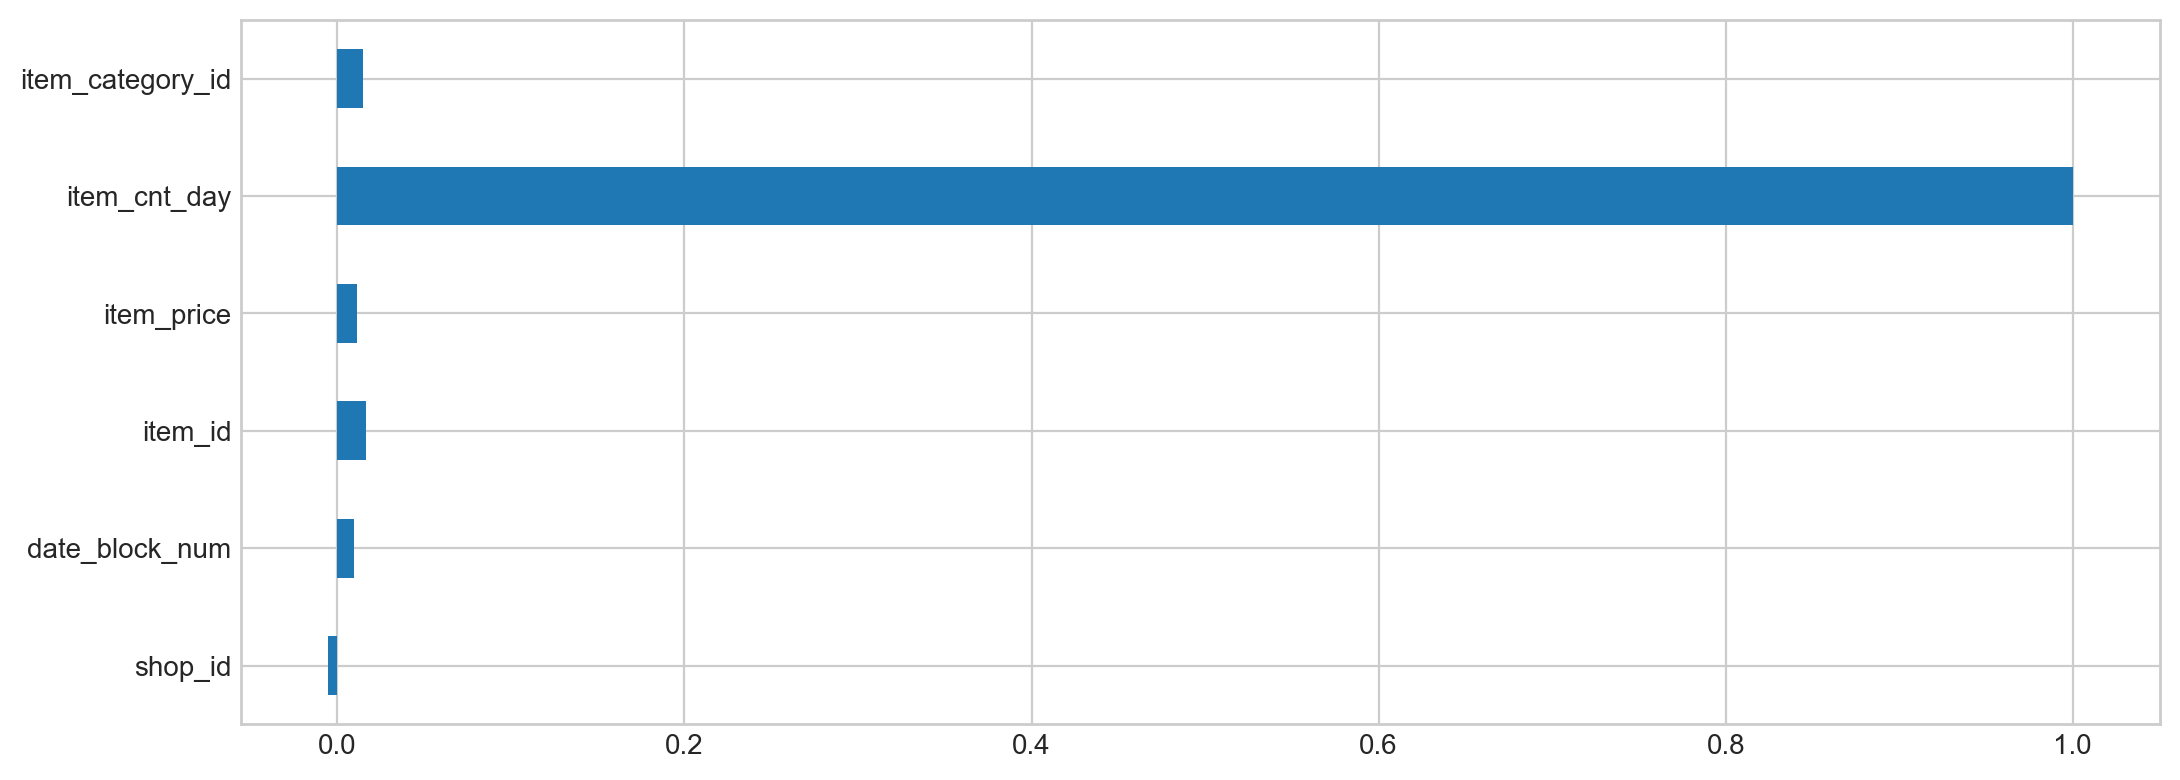

In [184]:
data.corrwith(data['item_cnt_day']).plot(kind='barh')

 #trying to find the correlation wrt target variable


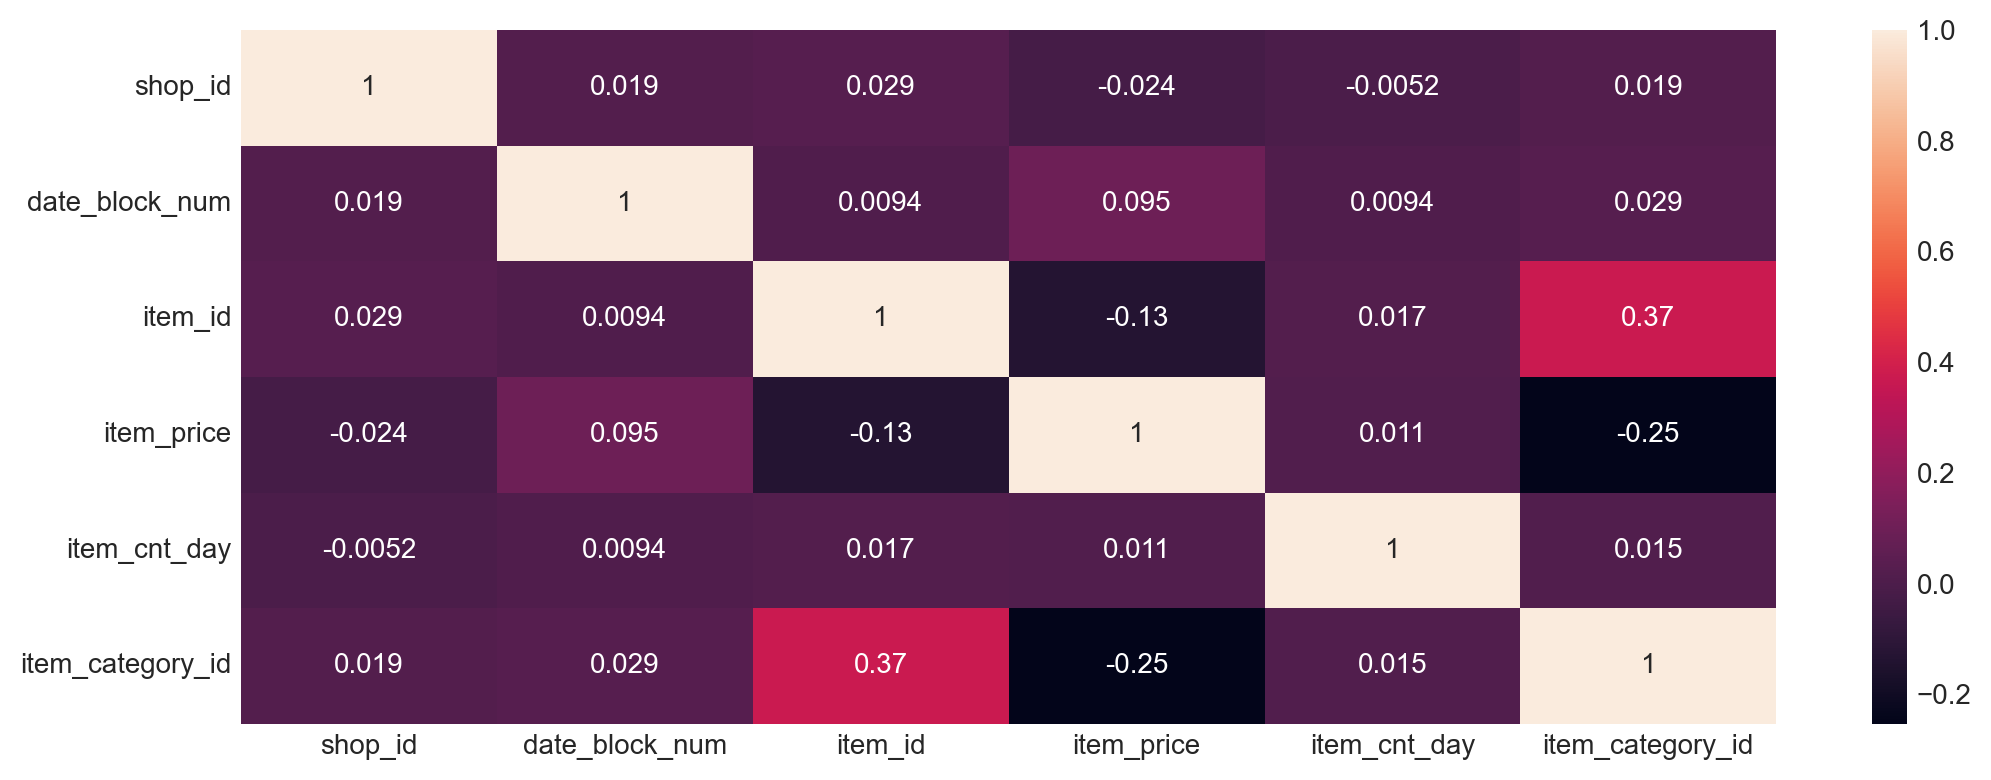

In [185]:
import seaborn as sns

ax = sns.heatmap(data.corr(), annot=True)


Heatmap doesn't give us very clear picture, but we can say we dont find much correlation with the target column.

In [186]:
df3 = data[["shop_name","item_category_name", "item_name"]] #lets create out data and choose the variables that are categorical
df3

,shop_name,item_category_name,item_name
0,"!Якутск Орджоникидзе, 56 фран",Кино - Blu-Ray,ЯВЛЕНИЕ 2012 (BD)
1,"!Якутск Орджоникидзе, 56 фран",Кино - Blu-Ray,ЯВЛЕНИЕ 2012 (BD)
2,"!Якутск Орджоникидзе, 56 фран",Музыка - Музыкальное видео,DEEP PURPLE Perihelion: Live In Concert DVD (К...
3,"!Якутск Орджоникидзе, 56 фран",Музыка - CD локального производства,DEFTONES Koi No Yokan
4,"!Якутск Орджоникидзе, 56 фран",Музыка - CD локального производства,DEL REY LANA Born To Die
...,...,...,...
2935844,"Ярославль ТЦ ""Альтаир""",Музыка - CD локального производства,HURTS Surrender
2935845,"Ярославль ТЦ ""Альтаир""",Музыка - CD локального производства,HURTS Surrender
2935846,"Ярославль ТЦ ""Альтаир""",Подарки - Мягкие игрушки,Мягкая игрушка Обезьянка Апельсинка 40см
2935847,"Ярославль ТЦ ""Альтаир""",Подарки - Сувениры,Кружка Assassin's Creed Syndicate Jacob Walking


In [187]:
df2 = data.drop(["shop_name","item_category_name", "item_name"], axis = 1)  #numerical data
df2

,shop_id,date,date_block_num,item_id,item_price,item_cnt_day,item_category_id
0,0,10.02.2013,1,22154,657.0,1.0,37
1,0,05.02.2013,1,22154,657.0,1.0,37
2,0,28.01.2013,0,2564,242.0,1.0,59
3,0,13.02.2013,1,2572,183.0,1.0,55
4,0,20.02.2013,1,2573,190.0,1.0,55
...,...,...,...,...,...,...,...
2935844,59,26.10.2015,33,3831,299.0,1.0,55
2935845,59,31.10.2015,33,3831,299.0,1.0,55
2935846,59,31.10.2015,33,15411,699.0,1.0,63
2935847,59,23.10.2015,33,13637,999.0,1.0,69


In [188]:
#####Data Preprocessing

In [189]:
from sklearn.preprocessing import LabelEncoder  #label encoding the categorical variables
    

train_x = df3.apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index ))


    

    
train_x = pd.DataFrame(train_x)
print(train_x)

         shop_name  item_category_name  item_name
0                0                  37      21791
1                0                  37      21791
2                0                  59       2507
3                0                  55       2514
4                0                  55       2515
...            ...                 ...        ...
2935844         59                  55       3752
2935845         59                  55       3752
2935846         59                  63      15137
2935847         59                  69      13384
2935848         59                  55       7316

[2935849 rows x 3 columns]


In [190]:
fr = [train_x, df2]     #creating the final dataset

dt = pd.concat(fr , axis = 1)

dt

,shop_name,item_category_name,item_name,shop_id,date,date_block_num,item_id,item_price,item_cnt_day,item_category_id
0,0,37,21791,0,10.02.2013,1,22154,657.0,1.0,37
1,0,37,21791,0,05.02.2013,1,22154,657.0,1.0,37
2,0,59,2507,0,28.01.2013,0,2564,242.0,1.0,59
3,0,55,2514,0,13.02.2013,1,2572,183.0,1.0,55
4,0,55,2515,0,20.02.2013,1,2573,190.0,1.0,55
...,...,...,...,...,...,...,...,...,...,...
2935844,59,55,3752,59,26.10.2015,33,3831,299.0,1.0,55
2935845,59,55,3752,59,31.10.2015,33,3831,299.0,1.0,55
2935846,59,63,15137,59,31.10.2015,33,15411,699.0,1.0,63
2935847,59,69,13384,59,23.10.2015,33,13637,999.0,1.0,69


In [191]:
train_x.isnull().sum()

shop_name             0
item_category_name    0
item_name             0
dtype: int64

In [192]:
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [193]:
dt['DATE'] = pd.to_datetime(dt['date']) #using datetime to convert the date into datetime format

dt.drop(['shop_name',"date_block_num"], axis =1 )

,item_category_name,item_name,shop_id,date,item_id,item_price,item_cnt_day,item_category_id,DATE
0,37,21791,0,10.02.2013,22154,657.0,1.0,37,2013-10-02
1,37,21791,0,05.02.2013,22154,657.0,1.0,37,2013-05-02
2,59,2507,0,28.01.2013,2564,242.0,1.0,59,2013-01-28
3,55,2514,0,13.02.2013,2572,183.0,1.0,55,2013-02-13
4,55,2515,0,20.02.2013,2573,190.0,1.0,55,2013-02-20
...,...,...,...,...,...,...,...,...,...
2935844,55,3752,59,26.10.2015,3831,299.0,1.0,55,2015-10-26
2935845,55,3752,59,31.10.2015,3831,299.0,1.0,55,2015-10-31
2935846,63,15137,59,31.10.2015,15411,699.0,1.0,63,2015-10-31
2935847,69,13384,59,23.10.2015,13637,999.0,1.0,69,2015-10-23


In [194]:
import pandas as pd

# Create a DataFrame with a date column

# Convert the date column to datetime

# Extract the month in numeric form
dt['Month'] = dt['DATE'].apply(lambda x: x.month)
dt['Year'] = dt['DATE'].apply(lambda x: x.year)


In [195]:
#dt['Month'] = [i.month for i in dt['DATE']]
#dt['Year'] = [i.year for i in dt['DATE']]
# create a sequence of numbers
# drop unnecessary columns and re-arrange
# check the head of the dataset
dt


,shop_name,item_category_name,item_name,shop_id,date,date_block_num,item_id,item_price,item_cnt_day,item_category_id,DATE,Month,Year
0,0,37,21791,0,10.02.2013,1,22154,657.0,1.0,37,2013-10-02,10,2013
1,0,37,21791,0,05.02.2013,1,22154,657.0,1.0,37,2013-05-02,5,2013
2,0,59,2507,0,28.01.2013,0,2564,242.0,1.0,59,2013-01-28,1,2013
3,0,55,2514,0,13.02.2013,1,2572,183.0,1.0,55,2013-02-13,2,2013
4,0,55,2515,0,20.02.2013,1,2573,190.0,1.0,55,2013-02-20,2,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,59,55,3752,59,26.10.2015,33,3831,299.0,1.0,55,2015-10-26,10,2015
2935845,59,55,3752,59,31.10.2015,33,3831,299.0,1.0,55,2015-10-31,10,2015
2935846,59,63,15137,59,31.10.2015,33,15411,699.0,1.0,63,2015-10-31,10,2015
2935847,59,69,13384,59,23.10.2015,33,13637,999.0,1.0,69,2015-10-23,10,2015


In [196]:
#REMOVING THE NEGATIVE VALUES OF TARGET VARIABLE

In [197]:
import pandas as pd

def drop_negative_values(df, column_name):
    df = df[df[column_name] >= 0]
    return df

In [198]:
drop_negative_values(dt, "item_cnt_day")
dt

,shop_name,item_category_name,item_name,shop_id,date,date_block_num,item_id,item_price,item_cnt_day,item_category_id,DATE,Month,Year
0,0,37,21791,0,10.02.2013,1,22154,657.0,1.0,37,2013-10-02,10,2013
1,0,37,21791,0,05.02.2013,1,22154,657.0,1.0,37,2013-05-02,5,2013
2,0,59,2507,0,28.01.2013,0,2564,242.0,1.0,59,2013-01-28,1,2013
3,0,55,2514,0,13.02.2013,1,2572,183.0,1.0,55,2013-02-13,2,2013
4,0,55,2515,0,20.02.2013,1,2573,190.0,1.0,55,2013-02-20,2,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,59,55,3752,59,26.10.2015,33,3831,299.0,1.0,55,2015-10-26,10,2015
2935845,59,55,3752,59,31.10.2015,33,3831,299.0,1.0,55,2015-10-31,10,2015
2935846,59,63,15137,59,31.10.2015,33,15411,699.0,1.0,63,2015-10-31,10,2015
2935847,59,69,13384,59,23.10.2015,33,13637,999.0,1.0,69,2015-10-23,10,2015


## **Let's try to see if we have got any outliers**

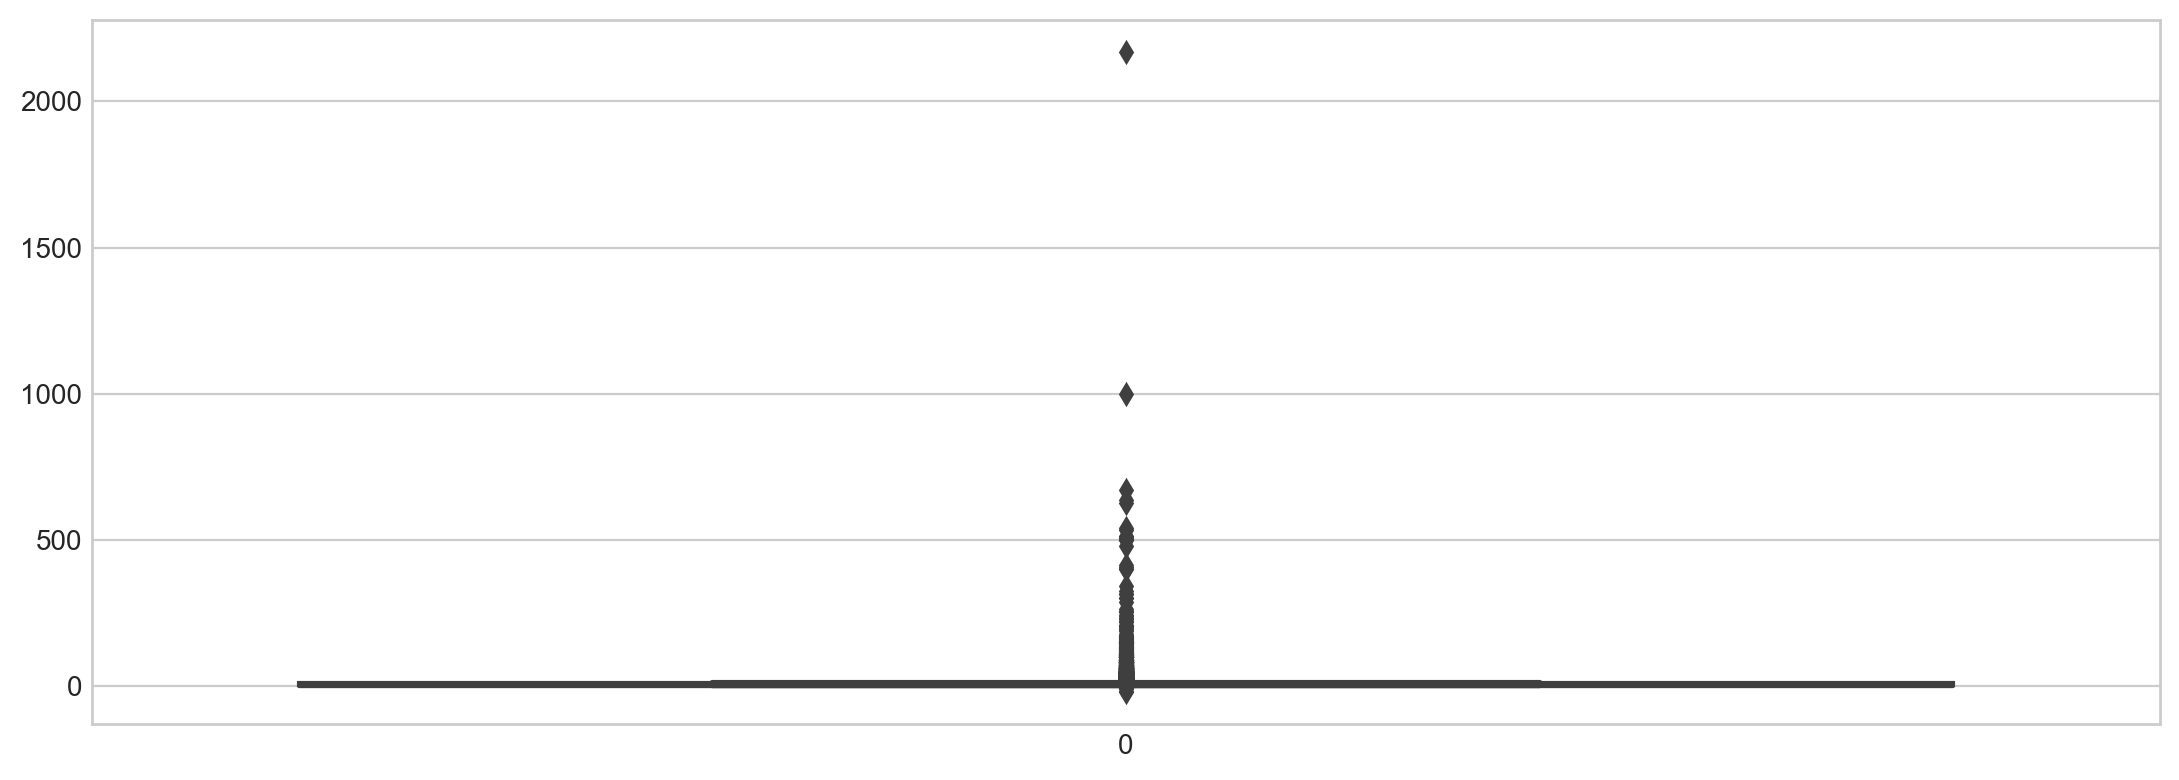

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt


# Select the columns to include in the plot
x = dt['Month']
y = dt['item_cnt_day']

# Create the boxplot
sns.boxplot( y)
sns.boxplot( x)

# Show the plot
plt.show()


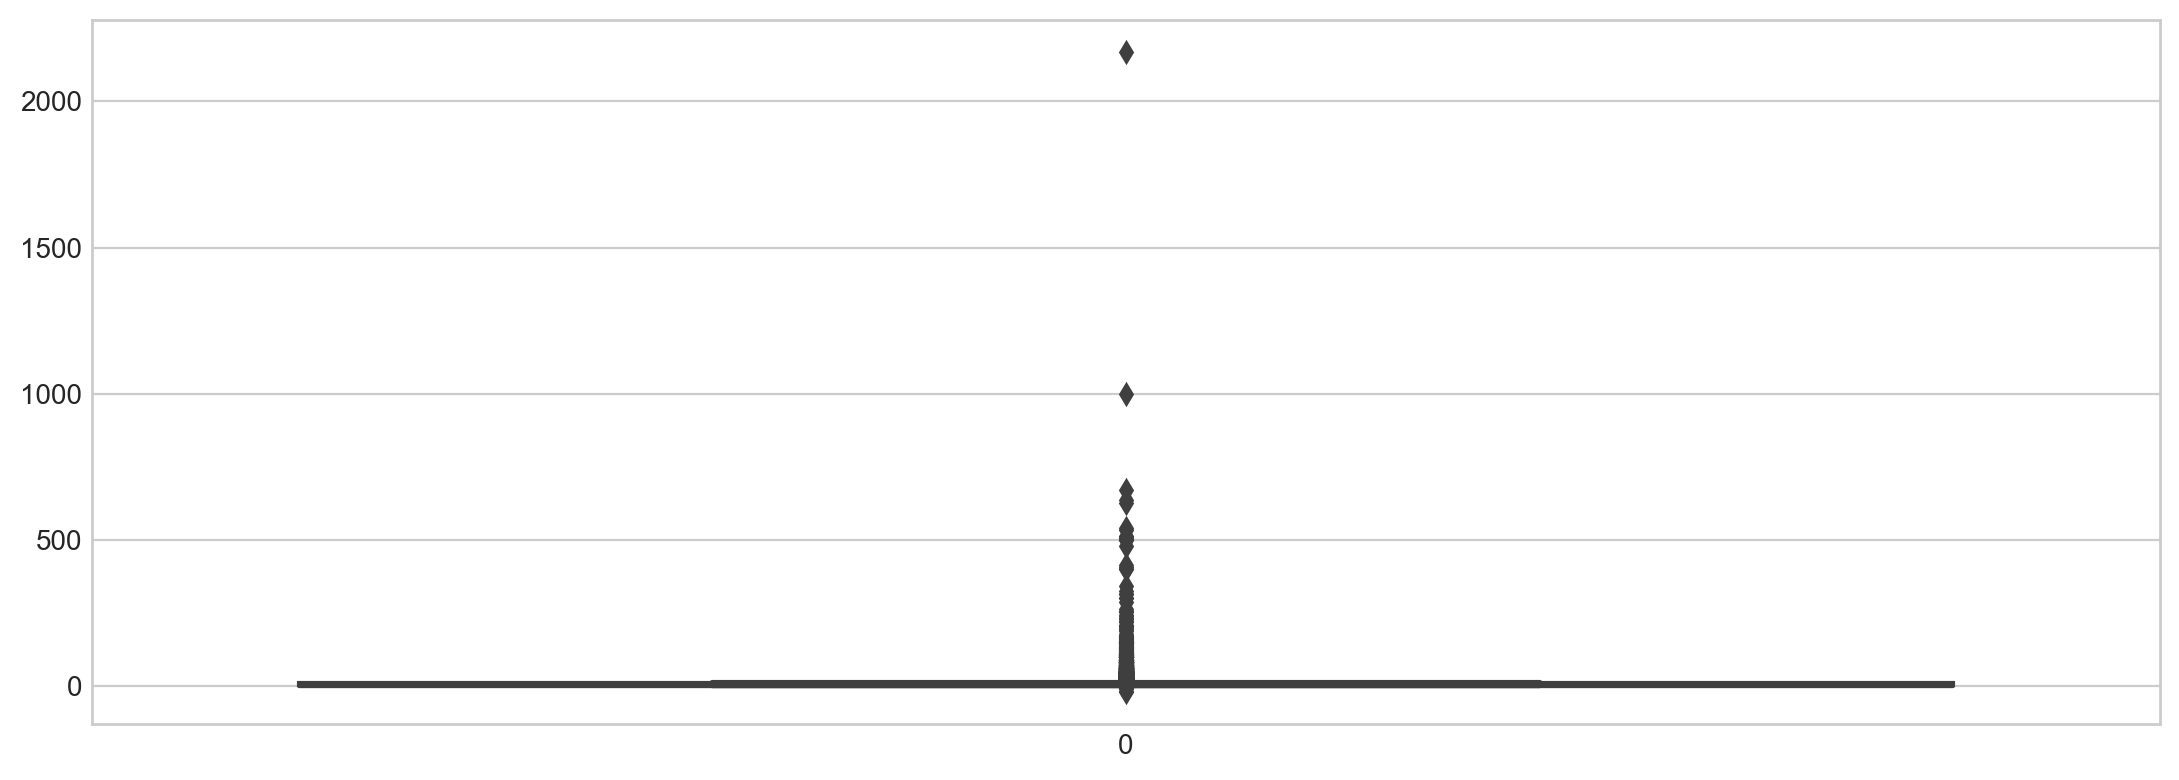

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt


# Select the columns to include in the plot
x = dt['item_cnt_day']
y = dt['Month']

# Create the scatterplot
sns.boxplot( y)
sns.boxplot( x)

# Show the plot
plt.show()


#REMOVING THE OUTLIERS USING **Z**-**SCORE** 

In [201]:
import pandas as pd
import numpy as np

# Calculate Z-scores for the column
z_scores = (dt['item_cnt_day'] - dt['item_cnt_day'].mean()) / dt['item_cnt_day'].std()

# Create a boolean mask indicating which rows are outliers
mask = np.abs(z_scores) > 3

# Use the mask to select only the rows that are not outliers
cd = dt[~mask]





In [202]:
test2 = pd.merge(test, cd, on = ['shop_id', "item_id"], how = 'left')  #merging with test data

# filling the empty values found in the dataset
test2.fillna(0, inplace = True)

# checking the dataset
test2

,ID,shop_id,item_id,shop_name,item_category_name,item_name,date,date_block_num,item_price,item_cnt_day,item_category_id,DATE,Month,Year
0,0,5,5037,5.0,19.0,4947.0,21.09.2014,20.0,2599.0,1.0,19.0,2014-09-21 00:00:00,9.0,2014.0
1,0,5,5037,5.0,19.0,4947.0,29.11.2014,22.0,2599.0,1.0,19.0,2014-11-29 00:00:00,11.0,2014.0
2,0,5,5037,5.0,19.0,4947.0,28.12.2014,23.0,1999.0,1.0,19.0,2014-12-28 00:00:00,12.0,2014.0
3,0,5,5037,5.0,19.0,4947.0,20.12.2014,23.0,1999.0,1.0,19.0,2014-12-20 00:00:00,12.0,2014.0
4,0,5,5037,5.0,19.0,4947.0,02.01.2015,24.0,1999.0,1.0,19.0,2015-02-01 00:00:00,2.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319738,214198,45,19648,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
1319739,214199,45,969,45.0,37.0,948.0,22.06.2014,17.0,549.0,1.0,37.0,2014-06-22 00:00:00,6.0,2014.0
1319740,214199,45,969,45.0,37.0,948.0,28.06.2014,17.0,549.0,2.0,37.0,2014-06-28 00:00:00,6.0,2014.0
1319741,214199,45,969,45.0,37.0,948.0,11.07.2014,18.0,549.0,1.0,37.0,2014-11-07 00:00:00,11.0,2014.0


In [203]:
#We can see the shape is not what we require. Therefore lets drop the duplicates

In [204]:
test2=test2.drop_duplicates(subset=["shop_id", "item_id"])

In [205]:
test2['DATE'] = pd.to_datetime(dt['date']) #using datetime to convert the date into datetime format



In [206]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 1319739
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID                  214200 non-null  int64         
 1   shop_id             214200 non-null  int64         
 2   item_id             214200 non-null  int64         
 3   shop_name           214200 non-null  float64       
 4   item_category_name  214200 non-null  float64       
 5   item_name           214200 non-null  float64       
 6   date                214200 non-null  object        
 7   date_block_num      214200 non-null  float64       
 8   item_price          214200 non-null  float64       
 9   item_cnt_day        214200 non-null  float64       
 10  item_category_id    214200 non-null  float64       
 11  DATE                214200 non-null  datetime64[ns]
 12  Month               214200 non-null  float64       
 13  Year                214200 n

In [207]:
test2

,ID,shop_id,item_id,shop_name,item_category_name,item_name,date,date_block_num,item_price,item_cnt_day,item_category_id,DATE,Month,Year
0,0,5,5037,5.0,19.0,4947.0,21.09.2014,20.0,2599.0,1.0,19.0,2013-10-02,9.0,2014.0
13,1,5,5320,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2013-04-01,0.0,0.0
14,2,5,5233,5.0,19.0,5141.0,17.05.2015,28.0,1199.0,2.0,19.0,2013-01-13,5.0,2015.0
23,3,5,5232,5.0,23.0,5140.0,28.08.2015,31.0,599.0,1.0,23.0,2013-02-21,8.0,2015.0
24,4,5,5268,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2013-02-19,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319721,214195,45,18454,45.0,55.0,18151.0,16.12.2014,23.0,199.0,1.0,55.0,2013-05-23,12.0,2014.0
1319730,214196,45,16188,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2013-12-06,0.0,0.0
1319731,214197,45,15757,45.0,55.0,15475.0,25.01.2013,0.0,199.0,1.0,55.0,2014-07-03,1.0,2013.0
1319738,214198,45,19648,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2013-08-31,0.0,0.0


In [208]:
cd.isnull().sum()#cool the shape is fine now

shop_name             0
item_category_name    0
item_name             0
shop_id               0
date                  0
date_block_num        0
item_id               0
item_price            0
item_cnt_day          0
item_category_id      0
DATE                  0
Month                 0
Year                  0
dtype: int64

In [209]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffic dataset
data2 = cd

# Create a time series in Pandas by setting the index to a date
# column. We parsed "Day" as a date type by using `parse_dates` when
# loading the data.
data2 = data2.set_index("Month")

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.

data2.head()

,shop_name,item_category_name,item_name,shop_id,date,date_block_num,item_id,item_price,item_cnt_day,item_category_id,DATE,Year
Month,,,,,,,,,,,,
10,0,37,21791,0,10.02.2013,1,22154,657.0,1.0,37,2013-10-02,2013
5,0,37,21791,0,05.02.2013,1,22154,657.0,1.0,37,2013-05-02,2013
1,0,59,2507,0,28.01.2013,0,2564,242.0,1.0,59,2013-01-28,2013
2,0,55,2514,0,13.02.2013,1,2572,183.0,1.0,55,2013-02-13,2013
2,0,55,2515,0,20.02.2013,1,2573,190.0,1.0,55,2013-02-20,2013


In [210]:
########################

In [211]:
df = data2.copy()      

df['time'] = np.arange(len(data2.index))

df.head()

,shop_name,item_category_name,item_name,shop_id,date,date_block_num,item_id,item_price,item_cnt_day,item_category_id,DATE,Year,time
Month,,,,,,,,,,,,,
10,0,37,21791,0,10.02.2013,1,22154,657.0,1.0,37,2013-10-02,2013,0
5,0,37,21791,0,05.02.2013,1,22154,657.0,1.0,37,2013-05-02,2013,1
1,0,59,2507,0,28.01.2013,0,2564,242.0,1.0,59,2013-01-28,2013,2
2,0,55,2514,0,13.02.2013,1,2572,183.0,1.0,55,2013-02-13,2013,3
2,0,55,2515,0,20.02.2013,1,2573,190.0,1.0,55,2013-02-20,2013,4


In [212]:
# Define a custom function to count negative values
def count_negatives(val):
  if val < 0:
    return 1
  return 0

# Count the number of negative values
num_negatives = df['item_price'].apply(count_negatives).sum()

# Print the result
print(f'Number of negative values: {num_negatives}')


Number of negative values: 1


# **Lag feature**
# **Pandas provides us a simple method to lag a series, the shift method**

In [213]:
df['Lag_1'] = df['item_cnt_day'].shift(1)
df.head()



,shop_name,item_category_name,item_name,shop_id,date,date_block_num,item_id,item_price,item_cnt_day,item_category_id,DATE,Year,time,Lag_1
Month,,,,,,,,,,,,,,
10,0,37,21791,0,10.02.2013,1,22154,657.0,1.0,37,2013-10-02,2013,0,NaN
5,0,37,21791,0,05.02.2013,1,22154,657.0,1.0,37,2013-05-02,2013,1,1.0
1,0,59,2507,0,28.01.2013,0,2564,242.0,1.0,59,2013-01-28,2013,2,1.0
2,0,55,2514,0,13.02.2013,1,2572,183.0,1.0,55,2013-02-13,2013,3,1.0
2,0,55,2515,0,20.02.2013,1,2573,190.0,1.0,55,2013-02-20,2013,4,1.0


In [214]:
df[['Lag_1']] =df[['Lag_1']].fillna(0)

In [215]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'item_cnt_day']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression(fit_intercept = True, copy_X = True, n_jobs = -1, positive = False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)


In [216]:
x_m = test2[["item_cnt_day"]]


y_test_pred = model.predict(x_m).clip(0., 20.)


In [217]:
prediction = pd.DataFrame(y_test_pred, columns=['item_cnt_month'])


In [218]:
prediction

,item_cnt_month
0,1.098437
1,0.712424
2,1.484451
3,1.098437
4,0.712424
...,...
214195,1.098437
214196,0.712424
214197,1.098437
214198,0.712424


In [219]:
prediction.to_csv('submissionLR.csv',index_label='ID')

## **Deeep learning with LSTM**

In [220]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

# Set seeds to make the experiment more reproducible.

import tensorflow as tf
tf.random.set_seed(1) 
from numpy.random import seed


Deep learning time series

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923910 entries, 10 to 10
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   shop_name           int32         
 1   item_category_name  int32         
 2   item_name           int32         
 3   shop_id             int64         
 4   date                object        
 5   date_block_num      int64         
 6   item_id             int64         
 7   item_price          float64       
 8   item_cnt_day        float64       
 9   item_category_id    int64         
 10  DATE                datetime64[ns]
 11  Year                int64         
 12  time                int32         
 13  Lag_1               float64       
dtypes: datetime64[ns](1), float64(3), int32(4), int64(5), object(1)
memory usage: 290.0+ MB


In [222]:
from dateutil.relativedelta import relativedelta

# Calculate the difference between the two dates in months
lag_size = relativedelta(test2['DATE'].max().date(), cd['DATE'].max().date()).months

print('Max date from train set: %s' % cd['DATE'].max().date())
print('Max date from test set: %s' % test2['DATE'].max().date())
print('Forecast lag size', lag_size)


Max date from train set: 2015-12-10
Max date from test set: 2015-12-10
Forecast lag size 0


In [223]:
# Calculate the difference between the two dates in days
day_diff = (test2['DATE'].max().date() - cd['DATE'].max().date()).days

# Calculate the number of months between the two dates
month_diff = day_diff // 30

print('Max date from train set: %s' % cd['DATE'].max().date())
print('Max date from test set: %s' % test2['DATE'].max().date())
print('Forecast lag size', month_diff)


Max date from train set: 2015-12-10
Max date from test set: 2015-12-10
Forecast lag size 0


In [224]:
monthly_sales = cd.groupby('Month', as_index=False)['item_cnt_day'].sum()
item_price_monthly_sales = cd.groupby(['item_price', 'Month'], as_index=False)['item_cnt_day'].sum()
shop_name_monthly_sales = cd.groupby(['shop_name', 'Month'], as_index=False)['item_cnt_day'].sum()

In [225]:
monthly_sales_sc = go.Scatter(x=monthly_sales['Month'], y=monthly_sales['item_cnt_day'])
layout = go.Layout(title='Monthly sales', xaxis=dict(title='Month'), yaxis=dict(title='item_cnt_day'))
fig1 = go.Figure(data=[monthly_sales_sc], layout=layout)


In [226]:
import plotly.express as px
import plotly.offline as py



In [227]:
import plotly.offline as py

# Display the figure
py.plot(fig1)

'temp-plot.html'

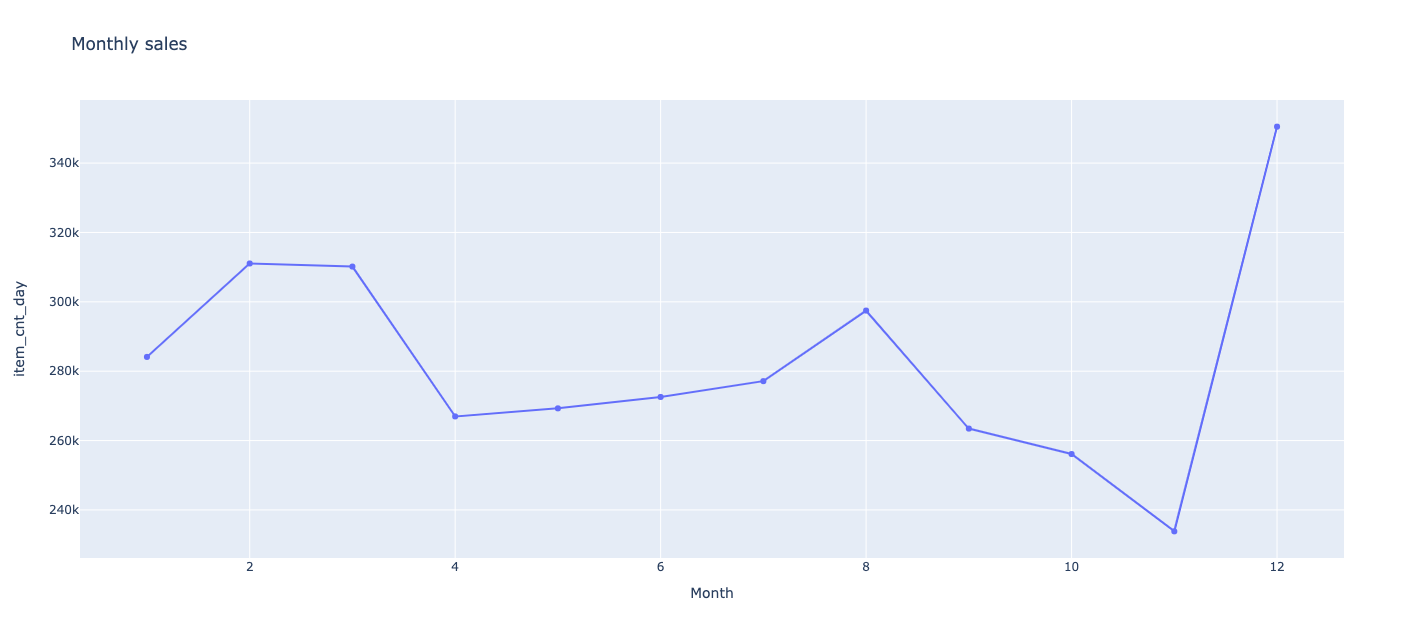

In [228]:
train = cd[(cd['Month']>1 )]

In [229]:
train_gp = train.sort_values('Month').groupby(['item_price', 'shop_id', 'Month'], as_index=False)
train_gp = train_gp.agg({'item_cnt_day':['mean']})
train_gp.columns = ['item_price', 'shop_id', 'Month', 'item_cnt_day']
train_gp.head()

,item_price,shop_id,Month,item_cnt_day
0,-1.0000,32,5,1.0
1,0.0700,6,11,1.0
2,0.0700,58,8,1.0
3,0.0875,58,8,4.0
4,0.0900,6,7,1.0


In [230]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [231]:
window = 29
lag = lag_size
series = series_to_supervised(train_gp.drop('Month', axis=1), window=window, lag=lag)
series.head()

,item_price(t-29),shop_id(t-29),item_cnt_day(t-29),item_price(t-28),shop_id(t-28),item_cnt_day(t-28),item_price(t-27),shop_id(t-27),item_cnt_day(t-27),item_price(t-26),...,item_cnt_day(t-2),item_price(t-1),shop_id(t-1),item_cnt_day(t-1),item_price(t),shop_id(t),item_cnt_day(t),item_price(t+0),shop_id(t+0),item_cnt_day(t+0)
29,-1.0000,32.0,1.0,0.0700,6.0,1.0,0.0700,58.0,1.000000,0.0875,...,1.00,0.1,4.0,1.00,0.1,4,1.75,0.1,4,1.75
30,0.0700,6.0,1.0,0.0700,58.0,1.0,0.0875,58.0,4.000000,0.0900,...,1.00,0.1,4.0,1.75,0.1,4,2.00,0.1,4,2.00
31,0.0700,58.0,1.0,0.0875,58.0,4.0,0.0900,6.0,1.000000,0.1000,...,1.75,0.1,4.0,2.00,0.1,5,1.00,0.1,5,1.00
32,0.0875,58.0,4.0,0.0900,6.0,1.0,0.1000,2.0,1.000000,0.1000,...,2.00,0.1,5.0,1.00,0.1,5,1.00,0.1,5,1.00
33,0.0900,6.0,1.0,0.1000,2.0,1.0,0.1000,2.0,1.090909,0.1000,...,1.00,0.1,5.0,1.00,0.1,5,1.00,0.1,5,1.00


In [232]:
series

,item_price(t-29),shop_id(t-29),item_cnt_day(t-29),item_price(t-28),shop_id(t-28),item_cnt_day(t-28),item_price(t-27),shop_id(t-27),item_cnt_day(t-27),item_price(t-26),...,item_cnt_day(t-2),item_price(t-1),shop_id(t-1),item_cnt_day(t-1),item_price(t),shop_id(t),item_cnt_day(t),item_price(t+0),shop_id(t+0),item_cnt_day(t+0)
29,-1.0000,32.0,1.0,0.0700,6.0,1.0,0.0700,58.0,1.000000,0.0875,...,1.00,0.1,4.0,1.00,0.1,4,1.75,0.1,4,1.75
30,0.0700,6.0,1.0,0.0700,58.0,1.0,0.0875,58.0,4.000000,0.0900,...,1.00,0.1,4.0,1.75,0.1,4,2.00,0.1,4,2.00
31,0.0700,58.0,1.0,0.0875,58.0,4.0,0.0900,6.0,1.000000,0.1000,...,1.75,0.1,4.0,2.00,0.1,5,1.00,0.1,5,1.00
32,0.0875,58.0,4.0,0.0900,6.0,1.0,0.1000,2.0,1.000000,0.1000,...,2.00,0.1,5.0,1.00,0.1,5,1.00,0.1,5,1.00
33,0.0900,6.0,1.0,0.1000,2.0,1.0,0.1000,2.0,1.090909,0.1000,...,1.00,0.1,5.0,1.00,0.1,5,1.00,0.1,5,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228598,35192.0000,28.0,1.0,35300.0000,12.0,1.0,35300.0000,12.0,1.000000,35300.0000,...,1.00,42990.0,12.0,1.00,42990.0,22,1.00,42990.0,22,1.00
228599,35300.0000,12.0,1.0,35300.0000,12.0,1.0,35300.0000,12.0,1.000000,35300.0000,...,1.00,42990.0,22.0,1.00,42990.0,42,1.00,42990.0,42,1.00
228600,35300.0000,12.0,1.0,35300.0000,12.0,1.0,35300.0000,22.0,1.000000,35300.0000,...,1.00,42990.0,42.0,1.00,50999.0,25,1.00,50999.0,25,1.00
228601,35300.0000,12.0,1.0,35300.0000,22.0,1.0,35300.0000,22.0,1.000000,35490.0000,...,1.00,50999.0,25.0,1.00,59200.0,12,1.00,59200.0,12,1.00


In [233]:
columns_to_drop = [('%s(t+%d)' % (col, lag)) for col in ['item_price', 'shop_id']]
for i in range(window, 0, -1):
    columns_to_drop += [('%s(t-%d)' % (col, i)) for col in ['item_price', 'shop_id']]
series.drop(columns_to_drop, axis=1, inplace=True)
series.drop(['item_price(t)', 'shop_id(t)'], axis=1, inplace=True)

In [234]:
series

,item_cnt_day(t-29),item_cnt_day(t-28),item_cnt_day(t-27),item_cnt_day(t-26),item_cnt_day(t-25),item_cnt_day(t-24),item_cnt_day(t-23),item_cnt_day(t-22),item_cnt_day(t-21),item_cnt_day(t-20),...,item_cnt_day(t-8),item_cnt_day(t-7),item_cnt_day(t-6),item_cnt_day(t-5),item_cnt_day(t-4),item_cnt_day(t-3),item_cnt_day(t-2),item_cnt_day(t-1),item_cnt_day(t),item_cnt_day(t+0)
29,1.0,1.0,1.000000,4.000000,1.000000,1.000000,1.090909,1.0,1.0,1.0,...,1.666667,1.000000,1.000000,1.157895,1.125000,1.190476,1.00,1.00,1.75,1.75
30,1.0,1.0,4.000000,1.000000,1.000000,1.090909,1.000000,1.0,1.0,1.0,...,1.000000,1.000000,1.157895,1.125000,1.190476,1.000000,1.00,1.75,2.00,2.00
31,1.0,4.0,1.000000,1.000000,1.090909,1.000000,1.000000,1.0,1.0,1.0,...,1.000000,1.157895,1.125000,1.190476,1.000000,1.000000,1.75,2.00,1.00,1.00
32,4.0,1.0,1.000000,1.090909,1.000000,1.000000,1.000000,1.0,1.0,1.0,...,1.157895,1.125000,1.190476,1.000000,1.000000,1.750000,2.00,1.00,1.00,1.00
33,1.0,1.0,1.090909,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.5,...,1.125000,1.190476,1.000000,1.000000,1.750000,2.000000,1.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228598,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.00,1.00,1.00
228599,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.00,1.00,1.00
228600,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.00,1.00,1.00
228601,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.00,1.00,1.00


In [235]:
# Label
labels_col = 'item_cnt_day(t+%d)' % lag_size
labels = series[labels_col]
series = series.drop(labels_col, axis=1)

X_train, X_valid, Y_train, Y_valid = train_test_split(series, labels.values, test_size=0.4, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
X_train.head()

Train set shape (137144, 30)
Validation set shape (91430, 30)


,item_cnt_day(t-29),item_cnt_day(t-28),item_cnt_day(t-27),item_cnt_day(t-26),item_cnt_day(t-25),item_cnt_day(t-24),item_cnt_day(t-23),item_cnt_day(t-22),item_cnt_day(t-21),item_cnt_day(t-20),...,item_cnt_day(t-9),item_cnt_day(t-8),item_cnt_day(t-7),item_cnt_day(t-6),item_cnt_day(t-5),item_cnt_day(t-4),item_cnt_day(t-3),item_cnt_day(t-2),item_cnt_day(t-1),item_cnt_day(t)
32207,1.0,1.0,1.0,1.000,1.000000,1.00,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
194533,1.0,2.0,4.0,1.000,1.000000,5.00,1.0,2.0,2.0,1.5,...,1.0,1.0,5.0,1.0,1.0,5.0,5.0,4.0,-1.0,1.0
90900,1.1,1.0,1.0,1.125,1.444444,1.75,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
166421,1.0,1.0,1.0,1.000,1.000000,1.00,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
160641,3.0,3.0,2.0,2.000,1.000000,8.00,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [236]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (137144, 30, 1)
Validation set shape (91430, 30, 1)


In [237]:
epochs = 40
batch = 256
lr = 0.0003
adam = optimizers.Adam(lr)


In [238]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer=adam)
model_lstm.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [239]:
lstm_history = model_lstm.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=1)

Epoch 1/40
4286/4286 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - loss: 0.2453 - val_loss: 2.3080e-04
Epoch 2/40
4286/4286 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 2.7743e-04 - val_loss: 1.2165e-04
Epoch 3/40
4286/4286 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - loss: 1.9911e-04 - val_loss: 1.1198e-04
Epoch 4/40
4286/4286 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - loss: 1.6516e-04 - val_loss: 3.3087e-05
Epoch 5/40
4286/4286 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - loss: 1.1915e-04 - val_loss: 1.1603e-05
Epoch 6/40
4286/4286 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - loss: 6.6313e-05 - val_loss: 9.0750e-06
Epoch 7/40
4286/4286 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 7.7092e-05 - val_loss: 7.0276e-06
Epoch 8/40
4286/4286 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 6.3730e-05 - val_loss: 7.2973e-06
Epoch 9/40
4286/4286 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - loss: 5.1816e-05 - val_loss: 2.5507e-05
Epoch 10/40
4286/4286 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 5.8416e-05 - val_loss: 7.6004e-06
Epoch 11/40
4286/4286 ━━━━━━━━━━━

In [240]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
# make predictions on the test data
y_pred_lstm = model_lstm.predict(X_valid_series)

# calculate the RMSE of the predictions
rmse = np.sqrt(mean_squared_error(Y_valid, y_pred_lstm))

print("RMSE:", rmse)



2858/2858 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
RMSE: 0.001963304855053597


In [245]:
x_m = test2[["item_cnt_day"]]


x_m = np.array(test2[["item_cnt_day"]]).reshape(-1, 1, 1)
y_test_pred = model_lstm.predict(x_m).clip(0., 20.)


prediction_lstm = pd.DataFrame(y_test_pred, columns=['item_cnt_month'])


# calculate the RMSE of the predictions
rmse = np.sqrt(mean_squared_error(x_m.reshape(-1, 1), y_test_pred))

print("RMSE:", rmse)

# calculate the RMAE of the predictions
rmae = np.sqrt(mean_absolute_error(x_m.reshape(-1, 1), y_test_pred))

print("RMAE:", rmae)

6694/6694 ━━━━━━━━━━━━━━━━━━━━ 5s 691us/step
RMSE: 0.623709295986548
RMAE: 0.6423431374568191


In [242]:
# calculate the RMSE of the predictions
rmse = np.sqrt(mean_squared_error(x_m, y_test_pred))

print("RMSE:", rmse)

# calculate the RMAE of the predictions
rmae = np.sqrt(mean_absolute_error(x_m, y_test_pred))

print("RMAE:", rmae)



RMSE: 0.5837356972448055
RMAE: 0.6593470993358732


In [246]:
prediction_lstm

,item_cnt_month
0,0.319664
1,0.022055
2,0.634940
3,0.319664
4,0.022055
...,...
214195,0.319664
214196,0.022055
214197,0.319664
214198,0.022055


In [247]:
prediction_lstm.to_csv('prediction_lstm.csv',index_label='ID')

In [248]:
import joblib

# Save the model to a file
joblib.dump(model_lstm, 'model.joblib')


['model.joblib']